# LSTM on DJIA data
Student Name: Girija Madireddy           
Student id: x21235929                      
Master of Science in Data Analytics

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

from pandas_datareader.data import DataReader
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.simplefilter("ignore")

set_seed(455)
np.random.seed(455)

In [2]:
start = datetime(2008, 8, 8)  # Start date is August 8, 2008
end = datetime(2016, 7, 1)   # End date is July 7,2016

dataset = yf.download("^DJI", start, end)


[*********************100%%**********************]  1 of 1 completed


In [3]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,11734.320312,212830000
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,11782.349609,183190000
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,11642.469727,173590000
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,11532.959961,182550000
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,11615.929688,159790000
...,...,...,...,...,...,...
2016-06-24,17946.630859,17946.630859,17356.339844,17400.750000,17400.750000,239000000
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,17140.240234,138740000
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,17409.720703,112190000


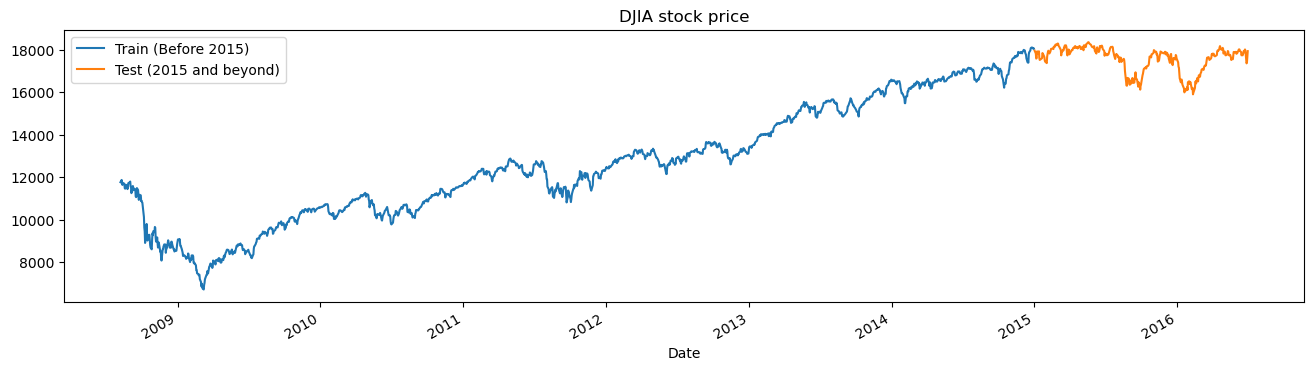

In [4]:
# Plot displaying train and test data distribution
tstart = 2008
tend = 2014

def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("DJIA stock price")
    plt.show()

train_test_plot(dataset,tstart,tend)

In [5]:
#Splitting training and testing data
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"]
    test = dataset.loc[f"{tend+1}":, "High"]
    return train, test

def train_test_split_values(dataset, tstart, tend):
    train, test =  train_test_split(dataset, tstart, tend)
    return train.values, test.values

training_set, test_set = train_test_split_values(dataset, tstart, tend)

In [6]:
training_set

array([11759.95996094, 11867.11035156, 11782.34960938, ...,
       18073.0390625 , 18035.01953125, 18043.22070312])

In [7]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

In [8]:
# Function to create input-output sequence pairs for LSTM input
def split_sequence(sequence, window):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + window
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

window_size = 60
features = 1

X_train, y_train = split_sequence(training_set_scaled, window_size)

In [9]:
# reshaping training data
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)

In [10]:
# LSTM model definition
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(window_size, features)))
model_lstm.add(Dense(25))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 125)               63500     
                                                                 
 dense (Dense)               (None, 25)                3150      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 66,676
Trainable params: 66,676
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Training the model
model_lstm.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
49/49 [==============================] - 3s 31ms/step - loss: 0.0210
Epoch 2/15
49/49 [==============================] - 2s 31ms/step - loss: 3.0688e-04
Epoch 3/15
49/49 [==============================] - 2s 32ms/step - loss: 2.4046e-04
Epoch 4/15
49/49 [==============================] - 2s 33ms/step - loss: 2.3824e-04
Epoch 5/15
49/49 [==============================] - 2s 34ms/step - loss: 2.3708e-04
Epoch 6/15
49/49 [==============================] - 2s 33ms/step - loss: 2.3491e-04
Epoch 7/15
49/49 [==============================] - 2s 33ms/step - loss: 2.3800e-04
Epoch 8/15
49/49 [==============================] - 2s 33ms/step - loss: 2.3260e-04
Epoch 9/15
49/49 [==============================] - 2s 33ms/step - loss: 2.2873e-04
Epoch 10/15
49/49 [==============================] - 2s 33ms/step - loss: 2.2224e-04
Epoch 11/15
49/49 [==============================] - 2s 33ms/step - loss: 2.2579e-04
Epoch 12/15
49/49 [==============================] - 2s 33ms/step - loss: 2.17

In [12]:
# Preparing test data
dataset_total = dataset.loc[:,"High"]
inputs = dataset_total[len(dataset_total) - len(test_set) - window_size :].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [13]:
# Preparing test sequence pairs and predicting trough model
X_test, y_test = split_sequence(inputs, window_size)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
predicted_stock_price = model_lstm.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y_test = sc.inverse_transform(y_test)

12/12 [==============================] - 0s 10ms/step


In [14]:
# Defining function to create plot of actual and predicted values
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()


def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

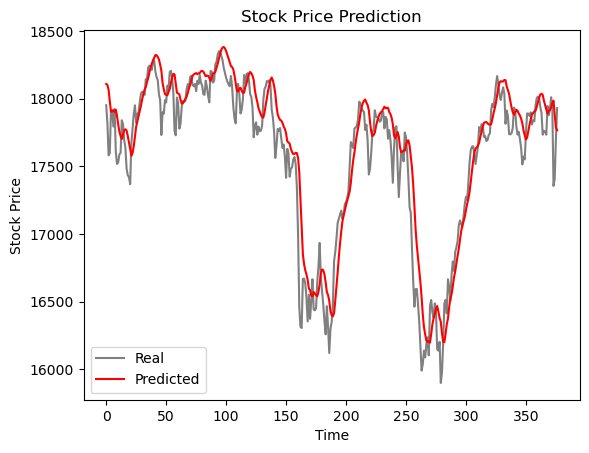

In [15]:
plot_predictions(y_test,predicted_stock_price)

In [16]:
# Calculating Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(y_test, predicted_stock_price)
print(f"The Mean Absolute Error is: {mae}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_stock_price))
print(f"The Root Mean Squared Error is: {rmse}")



The Mean Absolute Error is: 156.86925201011275
The Root Mean Squared Error is: 213.10873914871675


In [17]:
# GRU - Gated recurrent units ( another variant of Reccurrent Neural Netowrks ) - experimnet

In [18]:
# Model definition for GRU
model_gru = Sequential()
model_gru.add(GRU(units=125, activation="tanh", input_shape=(window_size, features)))
model_gru.add(Dense(units=1))

model_gru.compile(optimizer="adam", loss="mse")

model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 125)               48000     
                                                                 
 dense_2 (Dense)             (None, 1)                 126       
                                                                 
Total params: 48,126
Trainable params: 48,126
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Training GRU units
model_gru.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
49/49 [==============================] - 3s 26ms/step - loss: 0.0214
Epoch 2/10
49/49 [==============================] - 1s 27ms/step - loss: 4.4143e-04
Epoch 3/10
49/49 [==============================] - 1s 28ms/step - loss: 1.7722e-04
Epoch 4/10
49/49 [==============================] - 1s 28ms/step - loss: 1.6938e-04
Epoch 5/10
49/49 [==============================] - 1s 28ms/step - loss: 1.6312e-04
Epoch 6/10
49/49 [==============================] - 1s 29ms/step - loss: 1.5994e-04
Epoch 7/10
49/49 [==============================] - 1s 29ms/step - loss: 1.5485e-04
Epoch 8/10
49/49 [==============================] - 1s 29ms/step - loss: 1.4911e-04
Epoch 9/10
49/49 [==============================] - 1s 29ms/step - loss: 1.4686e-04
Epoch 10/10
49/49 [==============================] - 1s 29ms/step - loss: 1.4103e-04


In [20]:
# Prediction from GRU Model
GRU_predicted_stock_price = model_gru.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

12/12 [==============================] - 0s 8ms/step


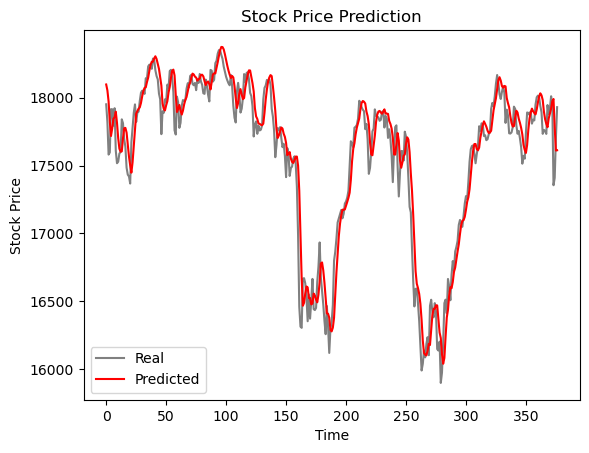

In [21]:
plot_predictions(y_test, GRU_predicted_stock_price)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(y_test, GRU_predicted_stock_price)
print(f"The Mean Absolute Error is: {mae}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, GRU_predicted_stock_price))
print(f"The Root Mean Squared Error is: {rmse}")


The Mean Absolute Error is: 124.02729971402522
The Root Mean Squared Error is: 167.3331342409507


In [23]:
# GRU is performing better then LSTM